## Neighborhood with the Most Pieces of Public Art in Pittsburgh


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas

In [4]:
# loads up data of all the public art in Pittsburgh and displays some
pgh_art_data = pd.read_csv("pgh_art_data.csv")
pgh_art_data = pgh_art_data.dropna()
pgh_art_data.head()

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
121,1678423235,WM00001000,Colonel James Anderson Monument,Daniel Chester French,Individual and Historic Monuments,Buhl Community Park at Allegheny Square,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453030,-80.005920
122,1527419187,WM00002000,George Washington Memorial,Edward Ludwig Albert Pausch,Individual and Historic Monuments,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.454559,-80.009575
123,1790632922,WM00003000,Hampton Battery Memorial,Unknown,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-20,40.450890,-80.000960
124,61964334,WM00004000,Maine Memorial,Charles Keck,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.453150,-80.010940
125,158501549,WM00005000,Civil War Soldiers Monument (Allegheny County),Peter C. Reniers,War Memorials,Allegheny Commons,https://tools.wprdc.org/images/pittsburgh/art_...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.453050,-80.012500


After loading my data set into the notebook I went through the data and finds how many pieces of public art are in each neighborhood.

In [5]:
import csv

with open ("pgh_art_data.csv") as f:
    pgh_art_data = [row for row in csv.reader(f)]
    
# goes through the data and counts how many pieces of art are in each neighborhood
art_counter = dict()

for row in pgh_art_data[1:]:
    neighborhood = row[7]
    
    if neighborhood not in art_counter:
        art_counter[neighborhood] = 1
    else:
        art_counter[neighborhood] = art_counter[neighborhood] + 1
art_counter        

{'Oakwood': 1,
 'Elliott': 3,
 'Central Business District': 27,
 'Carrick': 2,
 'Brookline': 2,
 'South Side Slopes': 3,
 '': 2,
 'Hazelwood': 3,
 'Highland Park': 10,
 'Squirrel Hill South': 20,
 'Perry North': 2,
 'Beltzhoover': 3,
 'Spring Hill-City View': 4,
 'West End': 2,
 'Greenfield': 3,
 'Shadyside': 6,
 'East Allegheny': 2,
 'Squirrel Hill North': 2,
 'Beechview': 7,
 'Crawford-Roberts': 3,
 'Lincoln-Lemington-Belmar': 2,
 'Hays': 1,
 'Allegheny Center': 18,
 'North Oakland': 1,
 'South Side Flats': 9,
 'Central Oakland': 5,
 'Point Breeze': 3,
 'Allegheny West': 1,
 'Strip District': 2,
 'Mount Washington': 2,
 'Brighton Heights': 5,
 'Perry South': 1,
 'North Shore': 8,
 'Upper Hill': 2,
 'Garfield': 2,
 'Central Lawrenceville': 2,
 'Upper Lawrenceville': 1,
 'Stanton Heights': 1,
 'Duquesne Heights': 3,
 'Allentown': 2,
 'East Liberty': 1,
 'Bloomfield': 1,
 'East Carnegie': 1,
 'East Hills': 1,
 'Lower Lawrenceville': 5,
 'Overbrook': 1,
 'Polish Hill': 1,
 'Regent Square

I then split this data into two different dictionaries and combined them into a single dataframe so It would work properly when plotting the map

In [6]:
#split dict into neighborhoods and number of pieces of art
neighborhoods = []
pieces_of_art = []
items = art_counter.items()
for item in items:
    neighborhoods.append(item[0]), pieces_of_art.append(item[1])

In [7]:
#create dataframe using my two dictionaries
art_df = pd.DataFrame({"neighborhood":neighborhoods,"number of pieces of art":pieces_of_art})

#sorted the dataframe from greatest to least
art_df.sort_values(by = "number of pieces of art", ascending = False)

,neighborhood,number of pieces of art
2,Central Business District,27
9,Squirrel Hill South,20
22,Allegheny Center,18
8,Highland Park,10
24,South Side Flats,9
32,North Shore,8
18,Beechview,7
15,Shadyside,6
44,Lower Lawrenceville,5
30,Brighton Heights,5


I then decided to plot the data into a bar graph to compare the top five neighborhoods with the most pieces of art.

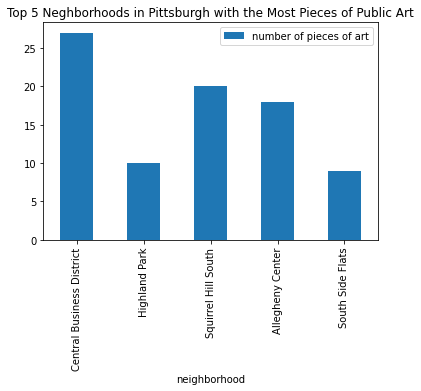

In [8]:
art_df_limited = art_df[art_df['number of pieces of art']>= 9]
art_df_limited.plot.bar(x="neighborhood", y = "number of pieces of art", title = "Top 5 Neghborhoods in Pittsburgh with the Most Pieces of Public Art")

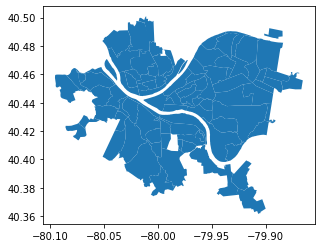

In [9]:
#loaded in shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

I then combined the the data from the dataframe I made with the Pittsburgh shape file.

In [10]:
#merge my art data frame and the shape file
art_map = neighborhoods.merge(art_df, how = 'left', left_on='hood', right_on='neighborhood')
art_map[['hood','number of pieces of art','geometry']]

,hood,number of pieces of art,geometry
0,Central Oakland,5.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,2.0,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


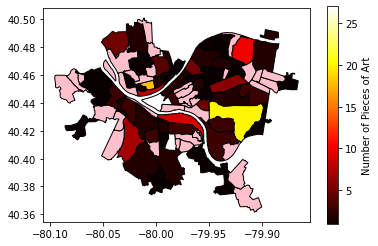

In [13]:
#plots the map of the data
art_map.plot(column='number of pieces of art',
             cmap = 'hot',
            edgecolor="black",
            legend=True,
            legend_kwds={'label':"Number of Pieces of Art"},
            missing_kwds={"color":"pink"})

Based off the data from my map and the the bar graph I believe the best neighborhood in Pittsburgh is either the Central Buisness Distric or Squirrel Hill South.